# FACS analysis: pBI-CMV codon-specific protein synthesis rate reporter #
* transiently transfect 1.5 ug plasmid into 12 well plate, passage into 6 well plate after 24 hours and begin starvation after 30 hours, starve for 40 hours (70h post transfection).
* plasmid reporters 1) YFP-WT: mCherry-DHFR, Flag-YFPwt-DHFRwt or 2) YFP-CGG: mCherry-DHFR, Flag-YFPcgg-DHFRcgg

## Analysis v1 : consider mean or median of entire population of 50000 events ##

1) simple thresholding for reasonable FSC/SSC values and NO fluorescence value based thresholding, 
2) plus/minus "no tmp" subtraction,
3) plus/minus mCherry normalization ## 

In [24]:
%matplotlib inline
from FlowCytometryTools import FCMeasurement
import matplotlib.pyplot as plt
import pandas
import numpy
from IPython.core.display import HTML
from matplotlib.ticker import MaxNLocator, LogLocator, AutoMinorLocator # custom tick locators for plots

In [25]:
sampleids = {1: 'wt_rich_tmp_1',
 2: 'wt_leu_tmp_1',
 3: 'wt_arg_tmp_1',
 10: 'cgg_rich_notmp_1',
 11: 'cgg_leu_notmp_1',
 12: 'cgg_arg_notmp_1',
 4: 'wt_rich_notmp_1',
 5: 'wt_leu_notmp_1',
 6: 'wt_arg_notmp_1',
 7: 'cgg_rich_tmp_1',
 8: 'cgg_leu_tmp_1',
 9: 'cgg_arg_tmp_1'}

#make sure this is right!

In [30]:
fcsFiles = !ls ../20160319/*.fcs

processeddata = dict()
for File in fcsFiles:
    print File
    ID = int( File.split( '/' )[-1].split( '.' )[0].split('_')[-1] )
    sampleid = sampleids[ID]
    fcsdata = FCMeasurement(ID= sampleid, datafile=File)
    fsc_threshold = 5e4
    ssc_threshold = 5e4
    processeddata[ sampleid ] = dict()
    subset = numpy.logical_and( fcsdata.data['FSC-A'] > fsc_threshold, fcsdata.data['SSC-A'] > ssc_threshold )
    processeddata[ sampleid ]['fsc_median'] = fcsdata.data['FSC-A'][subset].median()
    processeddata[ sampleid ]['fitc_mean'] = fcsdata.data['FITC-A'][subset].mean()
    processeddata[ sampleid ]['fitc_median'] = fcsdata.data['FITC-A'][subset].median()
    processeddata[ sampleid ]['fitc_q25'] = fcsdata.data['FITC-A'][subset].quantile(q=0.25)    
    processeddata[ sampleid ]['fitc_q75'] = fcsdata.data['FITC-A'][subset].quantile(q=0.75)
    processeddata[ sampleid ]['mcherry_median'] = fcsdata.data['PE-A'][subset].median()
    processeddata[ sampleid ]['mcherry_mean'] = fcsdata.data['PE-A'][subset].mean()
    processeddata[ sampleid ]['fsc_q25'] = fcsdata.data['FSC-A'][subset].quantile(q=0.25)    
    processeddata[ sampleid ]['fsc_q75'] = fcsdata.data['FSC-A'][subset].quantile(q=0.75)        

../20160319/Specimen_001_Tube_001.fcs
../20160319/Specimen_001_Tube_002.fcs
../20160319/Specimen_001_Tube_003.fcs
../20160319/Specimen_001_Tube_004.fcs
../20160319/Specimen_001_Tube_005.fcs
../20160319/Specimen_001_Tube_006.fcs
../20160319/Specimen_001_Tube_007.fcs
../20160319/Specimen_001_Tube_008.fcs
../20160319/Specimen_001_Tube_009.fcs
../20160319/Specimen_001_Tube_010.fcs
../20160319/Specimen_001_Tube_011.fcs
../20160319/Specimen_001_Tube_012.fcs


In [31]:
data = pandas.DataFrame.from_dict( processeddata, orient='index' )

In [33]:
data['samplelabel'] = data.index
#data['samplelabel'] = map( lambda x: '_'.join(x.split('_')[:-1]), data['samplelabel'])
#groupeddata = data.groupby( ['samplelabel'] )

In [34]:
HTML(data.to_html())

,fsc_q75,fitc_median,fitc_q25,mcherry_mean,fsc_q25,fitc_mean,fitc_q75,mcherry_median,fsc_median,samplelabel
cgg_arg_notmp,74317.830078,13.440000,-0.84,682.387082,53766.921875,478.095350,31.919998,83.740005,59174.470703,cgg_arg_notmp
cgg_arg_tmp,65778.601562,21.840000,2.52,3483.417162,53532.339844,2537.614617,312.479980,97.959999,58051.519531,cgg_arg_tmp
cgg_leu_notmp,78194.507812,15.120000,0.00,1043.071135,54254.025391,672.168285,36.959999,91.639999,62922.201172,cgg_leu_notmp
cgg_leu_tmp,81522.472656,36.119999,7.56,5065.129702,54435.695312,3343.615994,792.959961,162.740005,63633.341797,cgg_leu_tmp
cgg_rich_notmp,88845.882812,9.240000,-4.20,817.649285,56923.019531,199.720761,23.519999,59.250000,68037.078125,cgg_rich_notmp
cgg_rich_tmp,85957.474609,25.199999,4.20,4724.940827,57321.696289,1757.743695,194.039993,114.550003,66327.308594,cgg_rich_tmp
wt_arg_notmp,74276.023438,13.440000,-0.84,423.318890,53994.839844,355.241418,31.919998,79.790001,59704.679688,wt_arg_notmp
wt_arg_tmp,76486.027344,26.039999,4.20,2462.441555,54029.991211,2280.285925,456.959991,101.910004,59725.400391,wt_arg_tmp
wt_leu_notmp,83392.820312,16.799999,0.84,772.324373,55726.070312,664.506270,40.320000,90.850006,66858.257812,wt_leu_notmp
wt_leu_tmp,84680.421875,43.680000,9.24,3786.322513,55420.820312,4019.127149,1181.039917,161.949997,67100.984375,wt_leu_tmp


In [36]:
tmpsamples = map( lambda x: x.find('notmp') == -1, data.index)
dataTmp = data[tmpsamples]
dataNoTmp = data[numpy.logical_not(tmpsamples)]
dataNoTmp.index = map( lambda x: x.replace('_notmp',''), dataNoTmp.index)
dataTmp.index = map( lambda x: x.replace('_tmp',''), dataTmp.index)

In [38]:
dataTmp

,fsc_q75,fitc_median,fitc_q25,mcherry_mean,fsc_q25,fitc_mean,fitc_q75,mcherry_median,fsc_median,samplelabel
cgg_arg,65778.601562,21.840000,2.52,3483.417162,53532.339844,2537.614617,312.479980,97.959999,58051.519531,cgg_arg_tmp
cgg_leu,81522.472656,36.119999,7.56,5065.129702,54435.695312,3343.615994,792.959961,162.740005,63633.341797,cgg_leu_tmp
cgg_rich,85957.474609,25.199999,4.20,4724.940827,57321.696289,1757.743695,194.039993,114.550003,66327.308594,cgg_rich_tmp
wt_arg,76486.027344,26.039999,4.20,2462.441555,54029.991211,2280.285925,456.959991,101.910004,59725.400391,wt_arg_tmp
wt_leu,84680.421875,43.680000,9.24,3786.322513,55420.820312,4019.127149,1181.039917,161.949997,67100.984375,wt_leu_tmp
wt_rich,108629.042969,58.799999,13.44,3866.731333,67560.519531,2185.385658,636.719971,220.410004,85854.800781,wt_rich_tmp


In [39]:
dataNoTmp

,fsc_q75,fitc_median,fitc_q25,mcherry_mean,fsc_q25,fitc_mean,fitc_q75,mcherry_median,fsc_median,samplelabel
cgg_arg,74317.830078,13.440000,-0.84,682.387082,53766.921875,478.095350,31.919998,83.740005,59174.470703,cgg_arg_notmp
cgg_leu,78194.507812,15.120000,0.00,1043.071135,54254.025391,672.168285,36.959999,91.639999,62922.201172,cgg_leu_notmp
cgg_rich,88845.882812,9.240000,-4.20,817.649285,56923.019531,199.720761,23.519999,59.250000,68037.078125,cgg_rich_notmp
wt_arg,74276.023438,13.440000,-0.84,423.318890,53994.839844,355.241418,31.919998,79.790001,59704.679688,wt_arg_notmp
wt_leu,83392.820312,16.799999,0.84,772.324373,55726.070312,664.506270,40.320000,90.850006,66858.257812,wt_leu_notmp
wt_rich,99815.640625,10.920000,-3.36,757.306542,62538.878906,235.340630,26.039999,62.410000,80998.921875,wt_rich_notmp


In [44]:
subtractedMedianData = pandas.DataFrame()
subtractedMedianData['fitc_median'] = dataTmp['fitc_median'] - dataNoTmp['fitc_median']
subtractedMedianData['mcherry_median'] = dataTmp['mcherry_median'] - dataNoTmp['mcherry_median']

subtractedMeanData = pandas.DataFrame()
subtractedMeanData['fitc_mean'] = dataTmp['fitc_mean'] - dataNoTmp['fitc_mean']
subtractedMeanData['mcherry_mean'] = dataTmp['mcherry_mean'] - dataNoTmp['mcherry_mean']

#not really sure how to use the mCherry signal to normalize?  It's sort of independent from the YFP signal...

normalizedData = pandas.DataFrame()
normalizedData['fitc_over_mcherry_median'] = subtractedMedianData['fitc_median'] / subtractedMedianData['mcherry_median']
normalizedData['fitc_over_mcherry_mean'] = subtractedMeanData['fitc_mean'] / subtractedMeanData['mcherry_mean']



In [42]:
subtractedMedianData
#yfp median tmp - yfp median no tmp

,fitc_median,mcherry_median
cgg_arg,8.400001,14.219994
cgg_leu,20.999999,71.100006
cgg_rich,15.959999,55.300003
wt_arg,12.599999,22.120003
wt_leu,26.880001,71.099991
wt_rich,47.879999,158.000004


In [43]:
subtractedMeanData
#yfp mean tmp - yfp mean no tmp

,fitc_mean,mcherry_mean
cgg_arg,2059.519268,2801.030080
cgg_leu,2671.447709,4022.058567
cgg_rich,1558.022934,3907.291542
wt_arg,1925.044507,2039.122665
wt_leu,3354.620879,3013.998140
wt_rich,1950.045027,3109.424790


In [45]:
normalizedData
#subtracted means & medians normalized to mcherry signal

,fitc_over_mcherry_median,fitc_over_mcherry_mean
cgg_arg,0.590718,0.735272
cgg_leu,0.295359,0.664199
cgg_rich,0.288608,0.398748
wt_arg,0.569620,0.944055
wt_leu,0.378059,1.113014
wt_rich,0.303038,0.627140


*Note: tried plotting YFP median/mean without TMP subtraction - TMP subtraction has almost no effect no results (qualitatively)* &&
*median values are extremely low - need to threshold for "positive cells"  -- see Analysis v2 below*  

####  YFP mean expression, -tmp mean subtracted, NOT normalized to mCherry mean ####

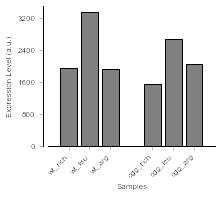

In [51]:
fig = plt.figure()
ax = fig.add_subplot(111)

sampleOrder = range(5,-1,-1)

xlocations = numpy.array([0,1,2,4,5,6])

ax.bar(xlocations, subtractedMeanData['fitc_mean'][sampleOrder], align='center' )
#x.errorbar(xlocations, meanSubtractedData['mean'][sampleOrder], 
            #meanSubtractedData['std'][sampleOrder], linestyle='None', color = 'black' )

spineOffset = {'left': 5, 'bottom': 0}    
[ spine.set_position(('outward',spineOffset[loc])) if loc in ['left','bottom'] 
     else spine.set_color('none') for loc, spine in ax.spines.items() ]         
ax.xaxis.set( ticks_position = 'bottom')
ax.yaxis.set( ticks_position = 'left')
ax.yaxis.set( major_locator = MaxNLocator(5) )

ax.set_xlabel('Samples')
ax.set_xticks(xlocations)
ax.set_xticklabels(normalizedData.index[sampleOrder], rotation=45, ha='right')

ax.set_ylabel( 'YFP Expression Level (a.u.)')

fig.set_size_inches([3,2.5])
#ig.savefig('../../20151002/fcs_files/20151002_psrpilot_talen_0910/processedData/20151002_unnormalizedexpression_24h.svg')

####  YFP median expression, -tmp median subtracted, NOT normalized to mCherry median ####

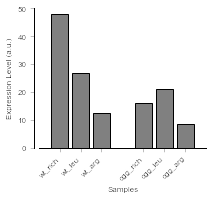

In [52]:
fig = plt.figure()
ax = fig.add_subplot(111)

sampleOrder = range(5,-1,-1)

xlocations = numpy.array([0,1,2,4,5,6])

ax.bar(xlocations, subtractedMedianData['fitc_median'][sampleOrder], align='center' )
#x.errorbar(xlocations, meanSubtractedData['mean'][sampleOrder], 
            #meanSubtractedData['std'][sampleOrder], linestyle='None', color = 'black' )

spineOffset = {'left': 5, 'bottom': 0}    
[ spine.set_position(('outward',spineOffset[loc])) if loc in ['left','bottom'] 
     else spine.set_color('none') for loc, spine in ax.spines.items() ]         
ax.xaxis.set( ticks_position = 'bottom')
ax.yaxis.set( ticks_position = 'left')
ax.yaxis.set( major_locator = MaxNLocator(5) )

ax.set_xlabel('Samples')
ax.set_xticks(xlocations)
ax.set_xticklabels(normalizedData.index[sampleOrder], rotation=45, ha='right')

ax.set_ylabel( 'YFP Expression Level (a.u.)')

fig.set_size_inches([3,2.5])
#ig.savefig('../../20151002/fcs_files/20151002_psrpilot_talen_0910/processedData/20151002_unnormalizedexpression_24h.svg')

This doesn't really make sense. why is wt rich median > wt leu median, but wt rich mean < wt leu mean?

####  YFP mean expression, -tmp mean subtracted, normalized to mCherry mean ####

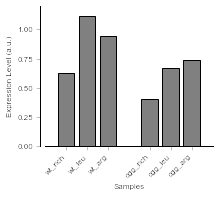

In [49]:
fig = plt.figure()
ax = fig.add_subplot(111)

sampleOrder = range(5,-1,-1)

xlocations = numpy.array([0,1,2,4,5,6])

ax.bar(xlocations, normalizedData['fitc_over_mcherry_mean'][sampleOrder], align='center' )
#x.errorbar(xlocations, meanSubtractedData['mean'][sampleOrder], 
            #meanSubtractedData['std'][sampleOrder], linestyle='None', color = 'black' )

spineOffset = {'left': 5, 'bottom': 0}    
[ spine.set_position(('outward',spineOffset[loc])) if loc in ['left','bottom'] 
     else spine.set_color('none') for loc, spine in ax.spines.items() ]         
ax.xaxis.set( ticks_position = 'bottom')
ax.yaxis.set( ticks_position = 'left')
ax.yaxis.set( major_locator = MaxNLocator(5) )

ax.set_xlabel('Samples')
ax.set_xticks(xlocations)
ax.set_xticklabels(normalizedData.index[sampleOrder], rotation=45, ha='right')

ax.set_ylabel( 'YFP/mCherry Expression Level (a.u.)')

fig.set_size_inches([3,2.5])
#ig.savefig('../../20151002/fcs_files/20151002_psrpilot_talen_0910/processedData/20151002_unnormalizedexpression_24h.svg')

####  YFP median expression, -tmp median subtracted, normalized to mCherry median ####

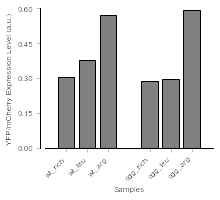

In [55]:
fig = plt.figure()
ax = fig.add_subplot(111)

sampleOrder = range(5,-1,-1)

xlocations = numpy.array([0,1,2,4,5,6])

ax.bar(xlocations, normalizedData['fitc_over_mcherry_median'][sampleOrder], align='center' )
#x.errorbar(xlocations, meanSubtractedData['mean'][sampleOrder], 
            #meanSubtractedData['std'][sampleOrder], linestyle='None', color = 'black' )

spineOffset = {'left': 5, 'bottom': 0}    
[ spine.set_position(('outward',spineOffset[loc])) if loc in ['left','bottom'] 
     else spine.set_color('none') for loc, spine in ax.spines.items() ]         
ax.xaxis.set( ticks_position = 'bottom')
ax.yaxis.set( ticks_position = 'left')
ax.yaxis.set( major_locator = MaxNLocator(5) )

ax.set_xlabel('Samples')
ax.set_xticks(xlocations)
ax.set_xticklabels(normalizedData.index[sampleOrder], rotation=45, ha='right')

ax.set_ylabel( 'YFP/mCherry Expression Level (a.u.)')

fig.set_size_inches([3,2.5])
#ig.savefig('../../20151002/fcs_files/20151002_psrpilot_talen_0910/processedData/20151002_unnormalizedexpression_24h.svg')

## Analysis v2 : Repeat analysis above with gating for YFP/mCherry positive cells after examining histograms & scatterplots of log-transformed data with FLowCytometryTools  ##

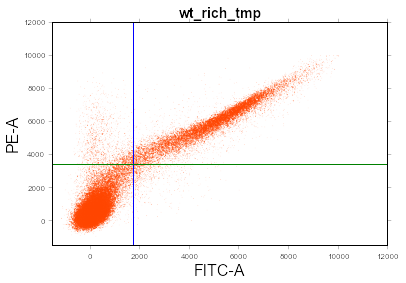

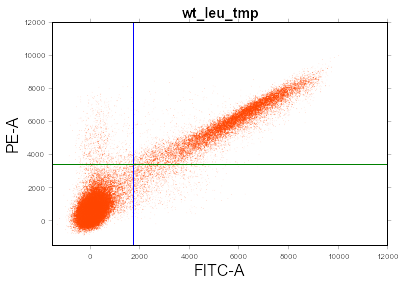

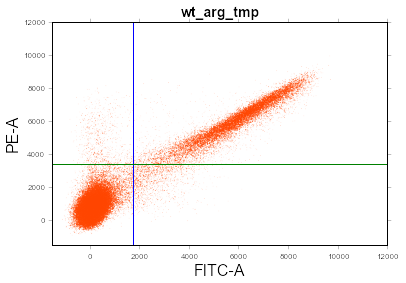

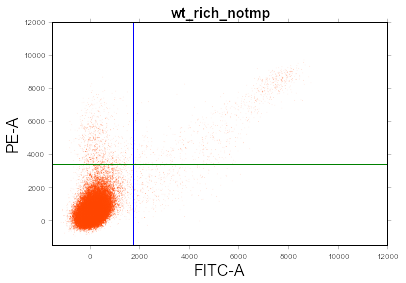

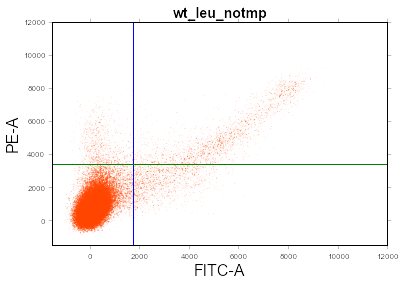

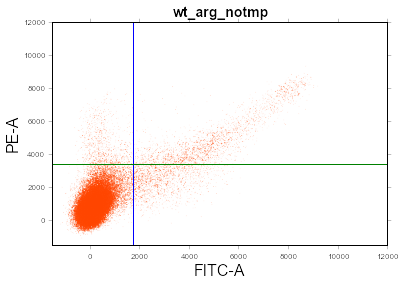

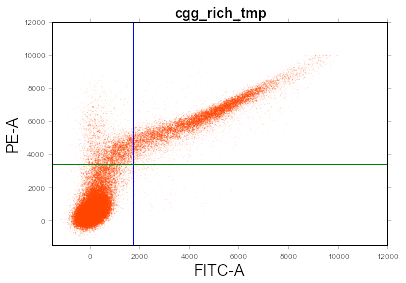

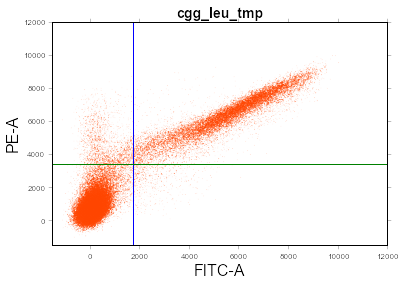

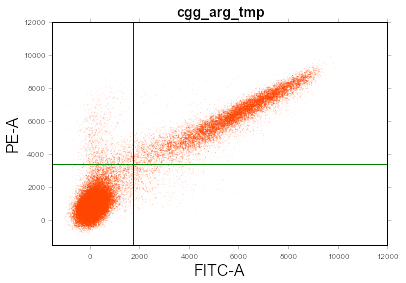

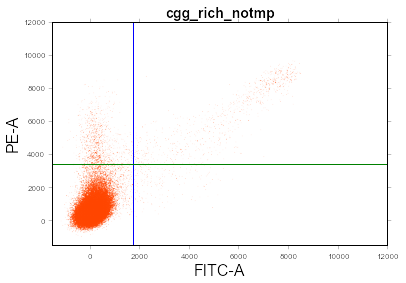

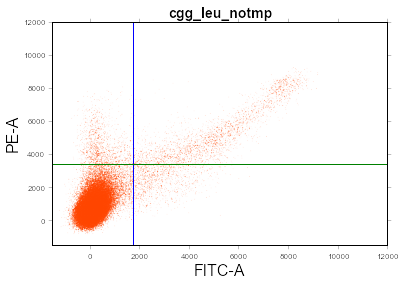

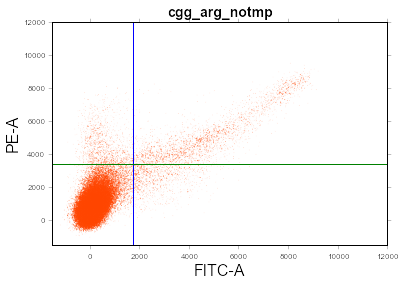

In [93]:
import os, FlowCytometryTools
from FlowCytometryTools import FCMeasurement
from FlowCytometryTools import ThresholdGate
from pylab import *

fcsFiles = !ls ../20160319/*.fcs

for File in fcsFiles:
    ID = int( File.split( '/' )[-1].split( '.' )[0].split('_')[-1] )
    sampleid = sampleids[ID]
    plotsample = FCMeasurement(ID= sampleid, datafile=File)
    #print plotsample.ID
    #print plotsample.channel_names  #names of lasers
    #print plotsample.channels  #useful: gives voltage values for all channels so I can keep this consisent - I changed gain of FITC to 440 in this exp.
    #print type(plotsample.data) #this is a pandas data frame with entries for fsc,ssc, and each laser, and time. 
    #print plotsample.data[['FITC-A', 'PE-A']][:10]  #this prints the 1st 10 entries in each column for FITC/mCherry values
    plotdata = plotsample.data
    #print plotdata['FITC-A'].describe()   #this prints overall statistics about the data for this sample.
    #print plotdata['FITC-A'].median()
    #print plotdata['PE-A'].median()
    #print plotdata.shape[0] #how many events are in the data"tube"
    
    #define gates based on visual analysis of scatter plot
    fitc_gate = ThresholdGate(1750.0, 'FITC-A', region='above')
    mcherry_gate = ThresholdGate(3400.0, 'PE-A', region='above')
    
    tsample = plotsample.transform('hlog', channels=['FITC-A','PE-A'], b=100)   # b controls the location where the transformation shifts from linear to log. The optimal value for this parameter depends on the range of your data. For smaller ranges, try smaller values of b. So if your population doesn’t show up well, just adjust b.
    axTitle = plotsample.ID
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.set_ylim(-1500,12000)
    ax.set_xlim(-1500,12000)
    ax.set_title( axTitle, fontsize=14, fontweight='bold')
    grid(True)
    #tsample.plot('FITC-A', color='green', bins=100) #plots a 1D histrogram
    tsample.plot(['FITC-A', 'PE-A'], kind='scatter', color='orangered', s=1, gates=[fitc_gate, mcherry_gate], alpha=0.5) #plots a 2d scatter plot. s value adjusts the weight of each point. alpha adjusts the transparency of each point between 1 and 0
    gatedsample = tsample.gate(fitc_gate, mcherry_gate)
    
    
    

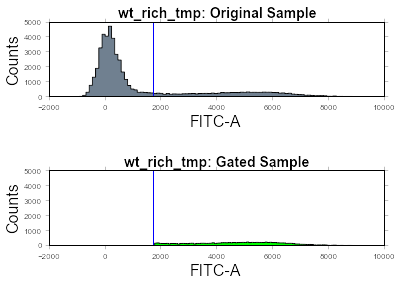

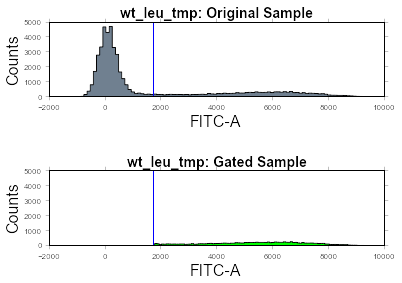

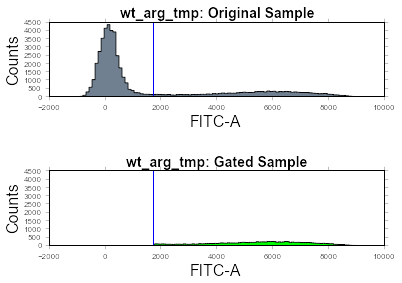

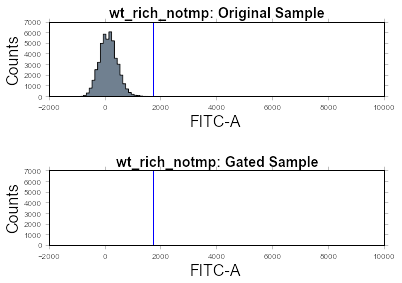

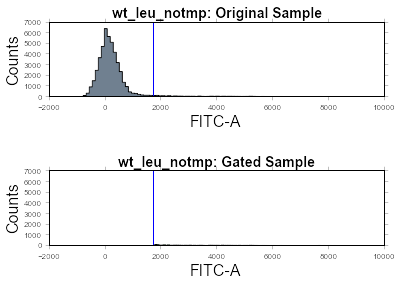

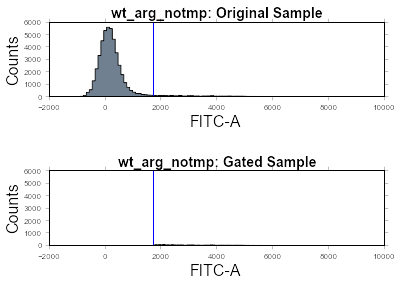

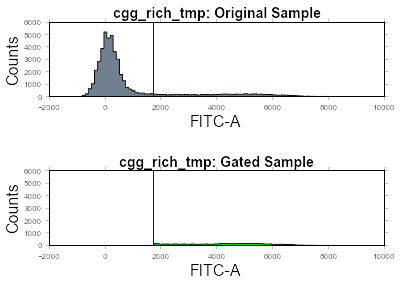

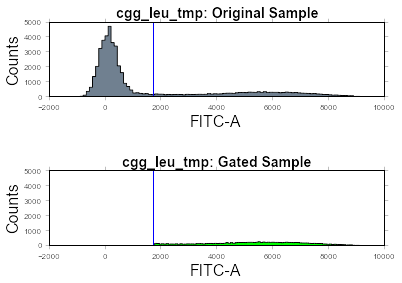

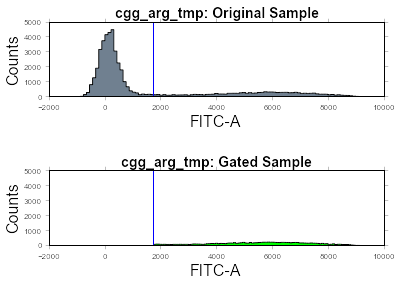

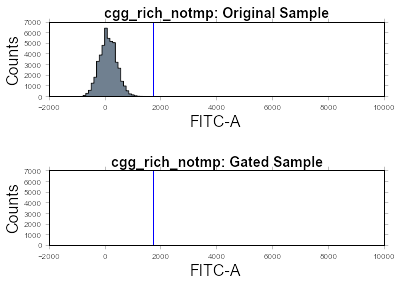

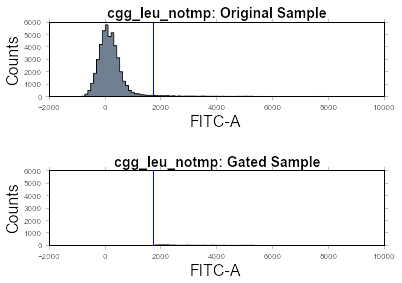

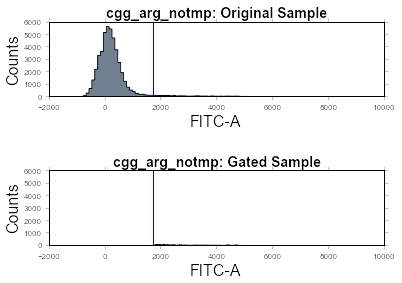

In [97]:
import os, FlowCytometryTools
from FlowCytometryTools import FCMeasurement
from FlowCytometryTools import ThresholdGate
from pylab import *

for File in fcsFiles:
    ID = int( File.split( '/' )[-1].split( '.' )[0].split('_')[-1] )
    sampleid = sampleids[ID]
    plotsample = FCMeasurement(ID= sampleid, datafile=File)
    plotdata = plotsample.data
    
    fitc_gate = ThresholdGate(1750.0, 'FITC-A', region='above')
    mcherry_gate = ThresholdGate(3400.0, 'PE-A', region='above')
    
    tsample = plotsample.transform('hlog', channels=['FITC-A','PE-A'], b=100)
    gatedsample = tsample.gate(fitc_gate, mcherry_gate)
                                   
    axTitle = plotsample.ID
    
    figure()
    subplots_adjust(hspace=1)
    ax1 = subplot(211)
    tsample.plot('FITC-A', color='slategray', bins=100, gates=[fitc_gate])
    title(axTitle + ': Original Sample', fontsize=14, fontweight='bold')
    ax2 = subplot(212, sharey=ax1, sharex=ax1)
    gatedsample.plot('FITC-A', color='lime', bins=100, gates=[fitc_gate])
    title(axTitle + ': Gated Sample', fontsize=14, fontweight='bold')
        
    
    
    
    

In [98]:
fcsFiles = !ls ../20160319/*.fcs
processedGatedData = dict()
for File in fcsFiles:
    ID = int( File.split( '/' )[-1].split( '.' )[0].split('_')[-1] )
    sampleid = sampleids[ID]
    
    processedGatedData[ sampleid ] = dict()
    
    plotsample = FCMeasurement(ID= sampleid, datafile=File)
    plotdata = plotsample.data
    
    fitc_gate = ThresholdGate(1750.0, 'FITC-A', region='above')
    mcherry_gate = ThresholdGate(3400.0, 'PE-A', region='above')
    
    tsample = plotsample.transform('hlog', channels=['FITC-A','PE-A'], b=100)
    gatedsample = tsample.gate(fitc_gate, mcherry_gate)
    gatedData = gatedsample.data
    #subset = numpy.logical_and( fcsdata.data['FSC-A'] > fsc_threshold, fcsdata.data['SSC-A'] > ssc_threshold )
    #processedGatedData[ sampleid ]['fsc_median'] = gatedData['FSC-A'].median()
    processedGatedData[ sampleid ]['fitc_mean'] = gatedData['FITC-A'].mean()
    processedGatedData[ sampleid ]['fitc_median'] = gatedData['FITC-A'].median()
    #processeddata[ sampleid ]['fitc_q25'] = fcsdata.data['FITC-A'][subset].quantile(q=0.25)    
    #processeddata[ sampleid ]['fitc_q75'] = fcsdata.data['FITC-A'][subset].quantile(q=0.75)
    processedGatedData[ sampleid ]['mcherry_median'] = gatedData['PE-A'].median()
    processedGatedData[ sampleid ]['mcherry_mean'] = gatedData['PE-A'].mean()
    #processeddata[ sampleid ]['fsc_q25'] = fcsdata.data['FSC-A'][subset].quantile(q=0.25)    
    #processeddata[ sampleid ]['fsc_q75'] = fcsdata.data['FSC-A'][subset].quantile(q=0.75)        

In [100]:
data = pandas.DataFrame.from_dict( processedGatedData, orient='index' )

In [101]:
data['samplelabel'] = data.index

In [102]:
HTML(data.to_html())

,fitc_mean,fitc_median,mcherry_median,mcherry_mean,samplelabel
cgg_arg_notmp,4255.985860,3870.872314,4294.375488,4532.375126,cgg_arg_notmp
cgg_arg_tmp,5514.583169,5660.759277,6227.910156,6097.469769,cgg_arg_tmp
cgg_leu_notmp,4424.994185,4101.327637,4271.830078,4522.071125,cgg_leu_notmp
cgg_leu_tmp,5357.765169,5464.895508,6315.656250,6203.752816,cgg_leu_tmp
cgg_rich_notmp,5118.650908,5228.800293,5940.299805,5838.900395,cgg_rich_notmp
cgg_rich_tmp,4618.646036,4575.775391,6233.793457,6279.699578,cgg_rich_tmp
wt_arg_notmp,4153.977508,3823.947754,3736.549805,3995.146577,wt_arg_notmp
wt_arg_tmp,5464.962538,5619.737793,5814.030273,5644.400212,wt_arg_tmp
wt_leu_notmp,4425.925446,4175.370605,3833.978271,4134.688748,wt_leu_notmp
wt_leu_tmp,5423.049826,5551.302246,5849.332031,5667.421595,wt_leu_tmp


In [103]:
tmpsamples = map( lambda x: x.find('notmp') == -1, data.index)
dataTmp = data[tmpsamples]
dataNoTmp = data[numpy.logical_not(tmpsamples)]
dataNoTmp.index = map( lambda x: x.replace('_notmp',''), dataNoTmp.index)
dataTmp.index = map( lambda x: x.replace('_tmp',''), dataTmp.index)

In [104]:
dataTmp

#NOTE: doesn't make sense to subtract no tmp value since I'm gating for only fluorescent cells & there is no normalization for the number of fl cells (since that will also depend on transfection eff.)

,fitc_mean,fitc_median,mcherry_median,mcherry_mean,samplelabel
cgg_arg,5514.583169,5660.759277,6227.910156,6097.469769,cgg_arg_tmp
cgg_leu,5357.765169,5464.895508,6315.656250,6203.752816,cgg_leu_tmp
cgg_rich,4618.646036,4575.775391,6233.793457,6279.699578,cgg_rich_tmp
wt_arg,5464.962538,5619.737793,5814.030273,5644.400212,wt_arg_tmp
wt_leu,5423.049826,5551.302246,5849.332031,5667.421595,wt_leu_tmp
wt_rich,4847.637361,4885.032715,5807.048340,5787.232631,wt_rich_tmp


In [105]:
normalizedData = pandas.DataFrame()
normalizedData['fitc_median'] = dataTmp['fitc_median'] / dataTmp['mcherry_median']
normalizedData['fitc_mean'] = dataTmp['fitc_mean'] / dataTmp['mcherry_mean']

#### Plot YFP median normalized to mCherry median, gate for positive YFP/mCherry cells only ####

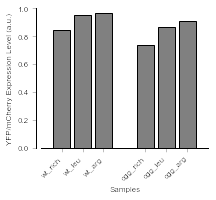

In [106]:
fig = plt.figure()
ax = fig.add_subplot(111)

sampleOrder = range(5,-1,-1)

xlocations = numpy.array([0,1,2,4,5,6])

ax.bar(xlocations, normalizedData['fitc_median'][sampleOrder], align='center' )
#x.errorbar(xlocations, meanSubtractedData['mean'][sampleOrder], 
            #meanSubtractedData['std'][sampleOrder], linestyle='None', color = 'black' )

spineOffset = {'left': 5, 'bottom': 0}    
[ spine.set_position(('outward',spineOffset[loc])) if loc in ['left','bottom'] 
     else spine.set_color('none') for loc, spine in ax.spines.items() ]         
ax.xaxis.set( ticks_position = 'bottom')
ax.yaxis.set( ticks_position = 'left')
ax.yaxis.set( major_locator = MaxNLocator(5) )

ax.set_xlabel('Samples')
ax.set_xticks(xlocations)
ax.set_xticklabels(normalizedData.index[sampleOrder], rotation=45, ha='right')

ax.set_ylabel( 'YFP/mCherry Expression Level (a.u.)')

fig.set_size_inches([3,2.5])
#ig.savefig('../../20151002/fcs_files/20151002_psrpilot_talen_0910/processedData/20151002_unnormalizedexpression_24h.svg')

#### Plot YFP mean normalized to mCherry mean, gate for positive YFP/mCherry cells only ####

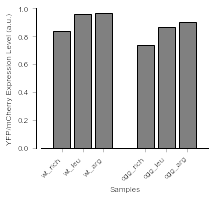

In [110]:
fig = plt.figure()
ax = fig.add_subplot(111)

sampleOrder = range(5,-1,-1)

xlocations = numpy.array([0,1,2,4,5,6])

ax.bar(xlocations, normalizedData['fitc_mean'][sampleOrder], align='center' )
#x.errorbar(xlocations, meanSubtractedData['mean'][sampleOrder], 
            #meanSubtractedData['std'][sampleOrder], linestyle='None', color = 'black' )

spineOffset = {'left': 5, 'bottom': 0}    
[ spine.set_position(('outward',spineOffset[loc])) if loc in ['left','bottom'] 
     else spine.set_color('none') for loc, spine in ax.spines.items() ]         
ax.xaxis.set( ticks_position = 'bottom')
ax.yaxis.set( ticks_position = 'left')
ax.yaxis.set( major_locator = MaxNLocator(5) )

ax.set_xlabel('Samples')
ax.set_xticks(xlocations)
ax.set_xticklabels(normalizedData.index[sampleOrder], rotation=45, ha='right')

ax.set_ylabel( 'YFP/mCherry Expression Level (a.u.)')

fig.set_size_inches([3,2.5])
#ig.savefig('../../20151002/fcs_files/20151002_psrpilot_talen_0910/processedData/20151002_unnormalizedexpression_24h.svg')

#### Plot YFP mean, gate for positive YFP/mCherry cells only ####

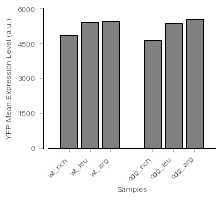

In [111]:
fig = plt.figure()
ax = fig.add_subplot(111)

sampleOrder = range(5,-1,-1)

xlocations = numpy.array([0,1,2,4,5,6])

ax.bar(xlocations, dataTmp['fitc_mean'][sampleOrder], align='center' )
#x.errorbar(xlocations, meanSubtractedData['mean'][sampleOrder], 
            #meanSubtractedData['std'][sampleOrder], linestyle='None', color = 'black' )

spineOffset = {'left': 5, 'bottom': 0}    
[ spine.set_position(('outward',spineOffset[loc])) if loc in ['left','bottom'] 
     else spine.set_color('none') for loc, spine in ax.spines.items() ]         
ax.xaxis.set( ticks_position = 'bottom')
ax.yaxis.set( ticks_position = 'left')
ax.yaxis.set( major_locator = MaxNLocator(5) )

ax.set_xlabel('Samples')
ax.set_xticks(xlocations)
ax.set_xticklabels(dataTmp.index[sampleOrder], rotation=45, ha='right')

ax.set_ylabel( 'YFP Mean Expression Level (a.u.)')

fig.set_size_inches([3,2.5])
#ig.savefig('../../20151002/fcs_files/20151002_psrpilot_talen_0910/processedData/20151002_unnormalizedexpression_24h.svg')

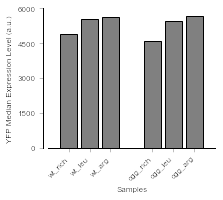

In [113]:
fig = plt.figure()
ax = fig.add_subplot(111)

sampleOrder = range(5,-1,-1)

xlocations = numpy.array([0,1,2,4,5,6])

ax.bar(xlocations, dataTmp['fitc_median'][sampleOrder], align='center' )
#x.errorbar(xlocations, meanSubtractedData['mean'][sampleOrder], 
            #meanSubtractedData['std'][sampleOrder], linestyle='None', color = 'black' )

spineOffset = {'left': 5, 'bottom': 0}    
[ spine.set_position(('outward',spineOffset[loc])) if loc in ['left','bottom'] 
     else spine.set_color('none') for loc, spine in ax.spines.items() ]         
ax.xaxis.set( ticks_position = 'bottom')
ax.yaxis.set( ticks_position = 'left')
ax.yaxis.set( major_locator = MaxNLocator(5) )

ax.set_xlabel('Samples')
ax.set_xticks(xlocations)
ax.set_xticklabels(dataTmp.index[sampleOrder], rotation=45, ha='right')

ax.set_ylabel( 'YFP Median Expression Level (a.u.)')

fig.set_size_inches([3,2.5])
#ig.savefig('../../20151002/fcs_files/20151002_psrpilot_talen_0910/processedData/20151002_unnormalizedexpression_24h.svg')

Thoughts: 
* Gating for fluorescent-only cells makes all values quite similar (not much shift due to starvation). I think this is real, since the TMP induction works well & rich condition gives a sense for the # of untransfected cells (not too different in rich vs leu vs arg, though more in rich presumably due to dilution).
* Non-physiological UTR & flooding cell w/ transient transfection might explain why it is tough to see any differences between starvation conditions & rich sample. Not completely unexpected outcome...
* How do I set the gates?  if cells become totally non-fluorescent due to starvation, I am excluding these inappropriately from the analysis.  On the other hand, if I include negative cells there is no way to separate a real loss of fluoresence from un-transfected cells.  
* Major problem with interpreting the "rich" sample, since it has divided 2-3 times more than the starved cells and thus the transfected plasmid is signficantly diluted amongst a greater # of cells. why doesn't mCherry normalization address this? 
* Find it somewhat difficult to interpret the mCherry internal control -- expression clearly changes in a starvation dependent manner, so I'm normalizing away starvation-dependent changes and leaving behind only codon-dependent changes in YFP, but seems like there's not much difference left. How many arg codons does mCherry have, and are they pause-sensitive or not? If pauses affect global translation, mCherry might actually affect global translation since it is way over-expressed...

Conclusions:
* if I consider all cells : considering yfp mean, result is qualitatively what we have seen before (for yfp wt, leu > arg.  for yfp cgg, leu < arg) when I normalize to mCherry. results are qualitatively completely different when median is considered and not mean - why is this?  Mean seems to make more sense given my previous data (b/c this is what I had analyzed in the past).
* if I consider only fluorescent cells, almost no difference between rich/leu/arg, whether or not I normalize to mcherry.